<a href="https://colab.research.google.com/github/boboguan/QM2Gr13/blob/main/QM2%20Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Impact of Oil Dependency on the Socio-Economic Development of Major Oil Exporters**



In [1]:
import pandas as pd
from sklearn.impute import SimpleImputer
import seaborn as sns
import numpy as np
import plotly
import plotly.express as px
import warnings
from statsmodels.formula.api import ols
from statsmodels.iolib.summary2 import summary_col
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')
sns.set(font_scale=1.5)
sns.set_style("white")
plt.rcParams['figure.figsize'] = (12, 8)

1. Download Necessary Libraries and Upload Database Into a Data file
2. Use appropriate Data Imputation Techniques to Fill in Missing Data


In [2]:
!mkdir data
!mkdir data/grproject

In [3]:
from google.colab import files
uploaded = files.upload()

Saving COUNTRY DATA NEW - COUNTRY DATA-2.csv to COUNTRY DATA NEW - COUNTRY DATA-2.csv


In [53]:
df = pd.read_csv('COUNTRY DATA NEW - COUNTRY DATA-2.csv', skiprows = 2)

df.columns = ['Country', 'Year', 'GDP_per_Capita', 'Oil_Rent',
              'Debt_to_GDP_Ratio', 'HDI', 'Democracy_Index',
              'Civil_Rights_Freedom_Indexes', 'Gini_Coefficient', 'Oil_Export', 'Oil_Production']

In [54]:
# Convert 'Years' to integer and other numerical columns to float
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')  # Convert to numeric, making non-numeric values NaN
df.dropna(subset=['Year'], inplace=True)  # Drop rows where 'Year' is NaN
df['Year'] = df['Year'].astype(int)
df['GDP_per_Capita'] = pd.to_numeric(df['GDP_per_Capita'], errors='coerce')
df['Oil_Rent'] = pd.to_numeric(df['Oil_Rent'], errors='coerce')
df['Debt_to_GDP_Ratio'] = pd.to_numeric(df['Debt_to_GDP_Ratio'], errors='coerce')
df['HDI'] = pd.to_numeric(df['HDI'], errors='coerce')
df['Gini_Coefficient'] = pd.to_numeric(df['Gini_Coefficient'], errors='coerce')
df['Oil_Export'] = pd.to_numeric(df['Oil_Export'], errors='coerce')
df['Oil_Production'] = pd.to_numeric(df['Oil_Production'], errors='coerce')

# Drop completely empty rows if any
df.dropna(how='all', inplace=True)

In [55]:
#Data Imputation
df['Gini_Coefficient'] = df['Gini_Coefficient'].interpolate(method='linear')
# Replace missing values with the mean or median of the country
df['GDP_per_Capita'] = df.groupby('Country')['GDP_per_Capita'].transform(lambda x: x.fillna(x.mean()))
df['Oil_Rent'] = df.groupby('Country')['Oil_Rent'].transform(lambda x: x.fillna(x.mean()))
df['Debt_to_GDP_Ratio'] = df.groupby('Country')['Debt_to_GDP_Ratio'].transform(lambda x: x.fillna(x.median()))

In [56]:
# Replace missing values with the mode of the country
df['Democracy_Index'] = df.groupby('Country')['Democracy_Index'].transform(lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else x))
df['Civil_Rights_Freedom_Indexes'] = df.groupby('Country')['Civil_Rights_Freedom_Indexes'].transform(lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else x))

In [57]:
# Verify the changes
print(df.head())
print(df.isnull().sum())

        Country  Year  GDP_per_Capita   Oil_Rent  Debt_to_GDP_Ratio    HDI  \
0  Saudi Arabia  2000      8795.26060  41.669171               87.2  0.737   
1  Saudi Arabia  2001      8337.32272  33.352663               93.7  0.744   
2  Saudi Arabia  2002      8380.95930  31.342448               96.9  0.750   
3  Saudi Arabia  2003      9321.80387  37.034522               82.0  0.760   
4  Saudi Arabia  2004     10935.01660  42.640930               65.0  0.770   

  Democracy_Index Civil_Rights_Freedom_Indexes  Gini_Coefficient  Oil_Export  \
0            1.93                          4.5               NaN      6253.0   
1            1.93                          4.5               NaN      6036.0   
2            1.93                          4.5               NaN      5285.0   
3            1.93                          4.5               NaN      6523.0   
4            1.93                          4.5               NaN      6813.0   

   Oil_Production  
0          8095.0  
1         

In [58]:
print(df)

          Country  Year  GDP_per_Capita   Oil_Rent  Debt_to_GDP_Ratio    HDI  \
0    Saudi Arabia  2000      8795.26060  41.669171               87.2  0.737   
1    Saudi Arabia  2001      8337.32272  33.352663               93.7  0.744   
2    Saudi Arabia  2002      8380.95930  31.342448               96.9  0.750   
3    Saudi Arabia  2003      9321.80387  37.034522               82.0  0.760   
4    Saudi Arabia  2004     10935.01660  42.640930               65.0  0.770   
..            ...   ...             ...        ...                ...    ...   
126           UAE  2016     41054.53960  11.080756               19.4  0.870   
127           UAE  2017     43063.96750  13.498573               21.6  0.897   
128           UAE  2018     46722.26870  17.098994               20.9  0.909   
129           UAE  2019     45376.17080  15.681591               27.3  0.920   
130           UAE  2020     37629.17420  10.494098               36.9  0.912   

    Democracy_Index Civil_Rights_Freedo

As seen on the graph, the Gini Coefficienct for Saudi Arabia can not be interpolated as there is only one data point of reference, 2019. Thus this is a weakness.

In [59]:
#Data Cleaning
df = df.replace(r'^\s*$', np.nan, regex=True) #replace the empty string or strings composed with whitespace charater np.nan
numeric_c = [col for col in df.columns if col != 'Country' and col != 'Year']
df[numeric_c] = df[numeric_c].apply(pd.to_numeric, errors='coerce') # change to numeric
df[numeric_c] = df[numeric_c].replace(' ', 'NaN', regex=True)

In [60]:
print(df)

          Country  Year  GDP_per_Capita   Oil_Rent  Debt_to_GDP_Ratio    HDI  \
0    Saudi Arabia  2000      8795.26060  41.669171               87.2  0.737   
1    Saudi Arabia  2001      8337.32272  33.352663               93.7  0.744   
2    Saudi Arabia  2002      8380.95930  31.342448               96.9  0.750   
3    Saudi Arabia  2003      9321.80387  37.034522               82.0  0.760   
4    Saudi Arabia  2004     10935.01660  42.640930               65.0  0.770   
..            ...   ...             ...        ...                ...    ...   
126           UAE  2016     41054.53960  11.080756               19.4  0.870   
127           UAE  2017     43063.96750  13.498573               21.6  0.897   
128           UAE  2018     46722.26870  17.098994               20.9  0.909   
129           UAE  2019     45376.17080  15.681591               27.3  0.920   
130           UAE  2020     37629.17420  10.494098               36.9  0.912   

     Democracy_Index  Civil_Rights_Free

**Exploratory Data Analysis (EDA)**:
To find relations between the variables in this data frame, we are going to conduct exploratory data analysis using boxplots and histograms for numerical data, scatter plots for categorical data, and line plots to visualise how data changes over time.

In [12]:
sns.set()

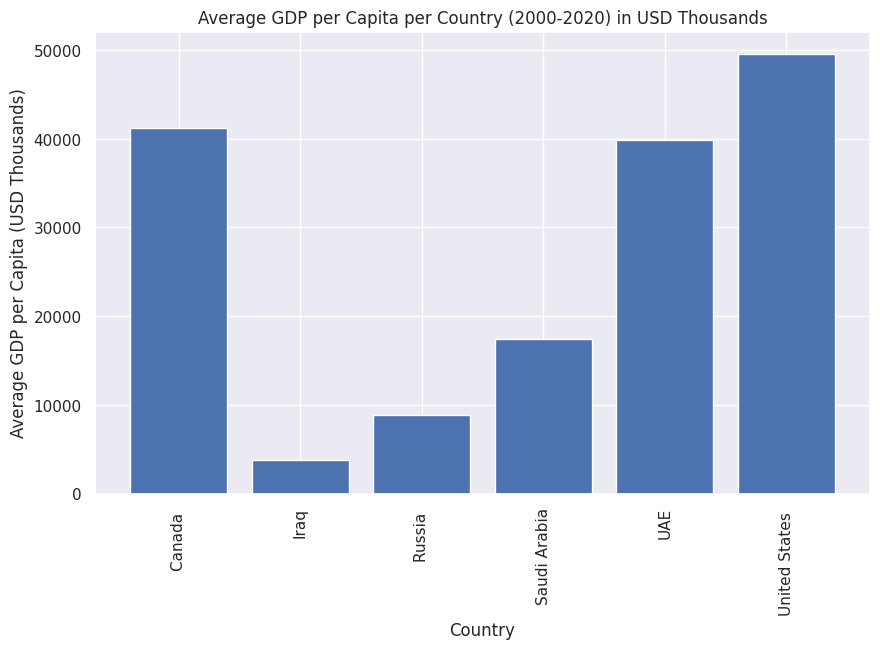

In [13]:
# Histogram
country_gdp = df.groupby('Country')['GDP_per_Capita'].mean().reset_index()
plt.figure(figsize=(10,6))
plt.bar(country_gdp['Country'], country_gdp['GDP_per_Capita'])
plt.title('Average GDP per Capita per Country (2000-2020) in USD Thousands')
plt.xlabel('Country')
plt.ylabel('Average GDP per Capita (USD Thousands)')
plt.xticks(rotation=90)  # Rotate country names for better readability
plt.show()

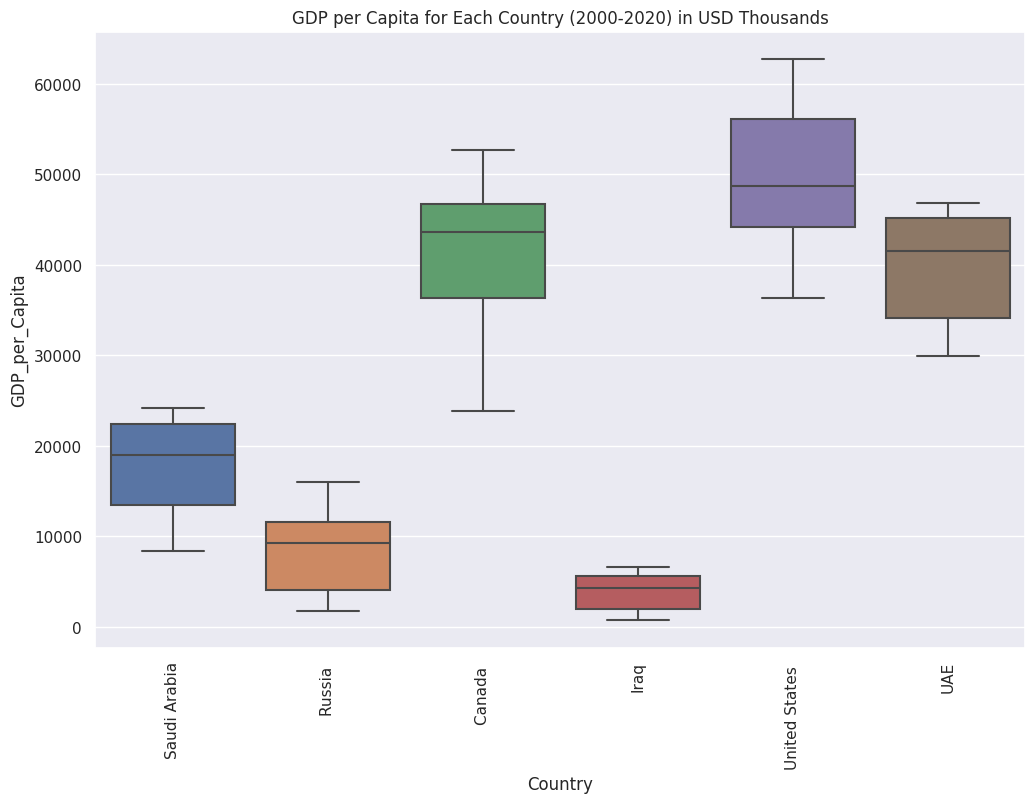

In [14]:
# Boxplot
plt.figure(figsize=(12,8))
sns.boxplot(x='Country', y='GDP_per_Capita', data=df)
plt.title('GDP per Capita for Each Country (2000-2020) in USD Thousands')
plt.xticks(rotation=90)  # Rotate country names for better readability
plt.show()

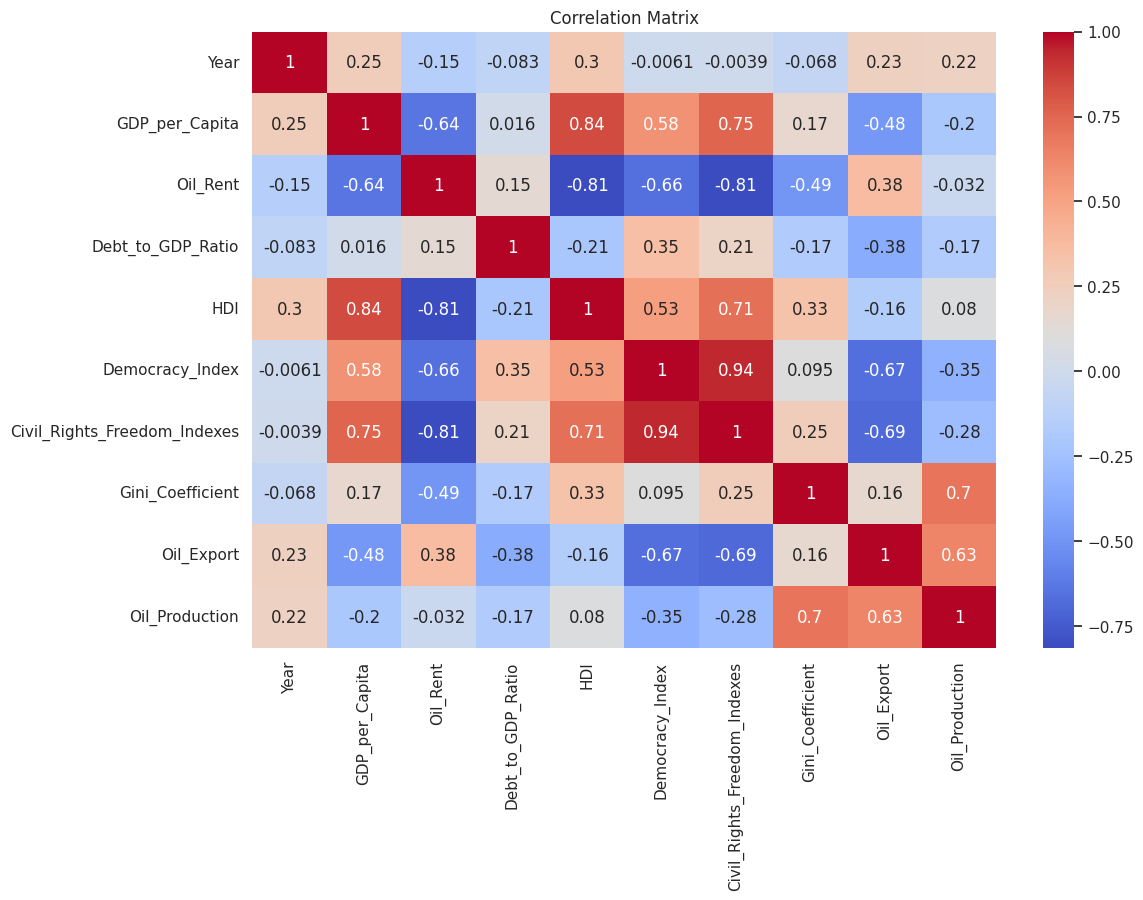

In [15]:
# Correlation matrix to understand how variables relate to each other
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

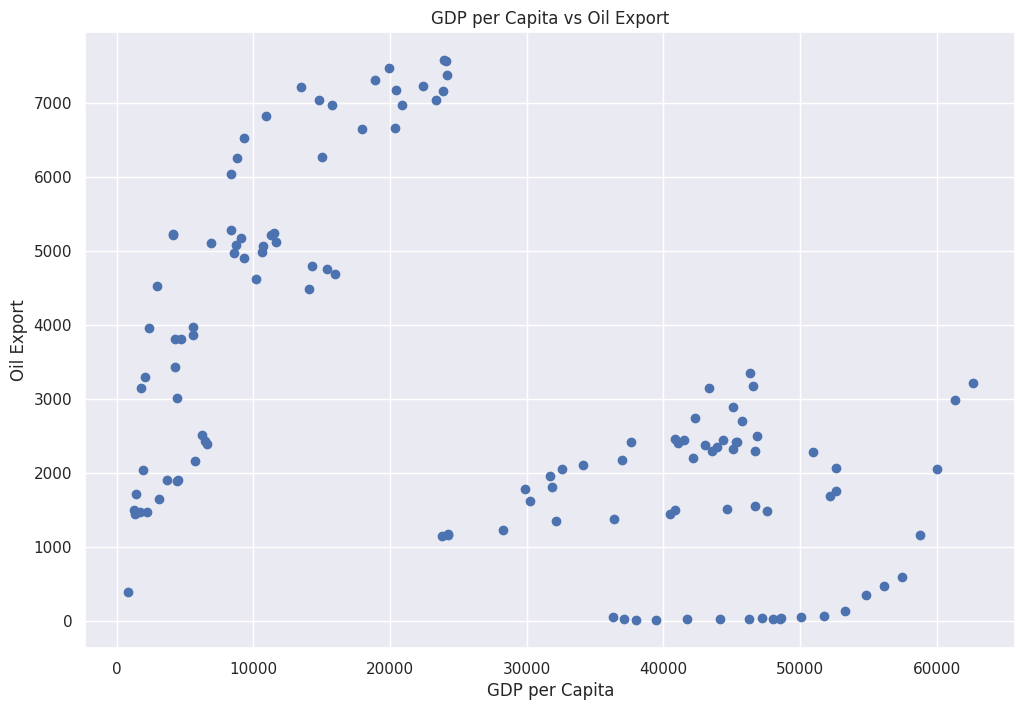

In [16]:
# Scatter plot to examine relationship between numerical variables
plt.scatter(df['GDP_per_Capita'], df['Oil_Export'])
plt.title('GDP per Capita vs Oil Export')
plt.xlabel('GDP per Capita')
plt.ylabel('Oil Export')
plt.show()

**Panel Regression Analysis**

In [17]:
!pip install linearmodels

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.2/94.2 kB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.1/42.1 kB 4.4 MB/s eta 0:00:00


**Panel Regrssion Analysis** is a combination of cross section data and time series, where the same unit cross section is measured at different times.

With the panel data, we could analysis a country over multiple periods; and cross-section data enables the comparison of different countries at a point in time, allowing for the assessment of differences and similarities across countries.

We use a **fixed effects model (FE)** for panel regression, as the unobserved country-specific effects are likely to be correlated with our independent variables - Oil Export.


$$\ Y_{it}=\alpha+\beta(Oil~Export)_{it}+\mu{i}+\gamma{t}+\epsilon_{it}$$

Where:
* $\ Y_{it}$: The dependent variable for country i at time t.

*  $\alpha_i$: The fixed effect for each entity (country) i, capturing all unobserved, time-invariant influences on the oil export that are unique to each country.

* $\ Oil Export_{it}$: The independent variable, which is the oil export value for country i at time t.

*  $\beta$: Coefficient of oil export, showing the impact of oil exports on the dependent variable.

* $\mu{i}$and $\gamma{t}$: Unobserved country/time specific effect.

* $\epsilon_{it}$: The error term for country i at time t, representing other unobserved factors affected by oil export.

After printing out the regression table, we also generate scatter plot with regression line for better visualisation.




In [18]:
#Panel Regression
import pandas as pd
from linearmodels import PanelOLS
from linearmodels import RandomEffects
import statsmodels.formula.api as smf
from linearmodels.panel import compare

df=df.set_index(['Country','Year'])
dependent_vars = ['Debt_to_GDP_Ratio', 'HDI', 'Democracy_Index', 'Civil_Rights_Freedom_Indexes', 'Gini_Coefficient']

models = {}
# Loop through each dependent variable
for dv in dependent_vars:
    formula = f'{dv} ~ 1 + Oil_Export + EntityEffects'
    model = PanelOLS.from_formula(formula, data=df).fit()
    models[dv] = model

print(compare(models, stars=True))

                                                            Model Comparison                                                            
                            Debt_to_GDP_Ratio              HDI     Democracy_Index     Civil_Rights_Freedom_Indexes     Gini_Coefficient
----------------------------------------------------------------------------------------------------------------------------------------
Dep. Variable               Debt_to_GDP_Ratio              HDI     Democracy_Index     Civil_Rights_Freedom_Indexes     Gini_Coefficient
Estimator                            PanelOLS         PanelOLS            PanelOLS                         PanelOLS             PanelOLS
No. Observations                          126              126                 124                              126                  108
Cov. Est.                          Unadjusted       Unadjusted          Unadjusted                       Unadjusted           Unadjusted
R-squared                              0.

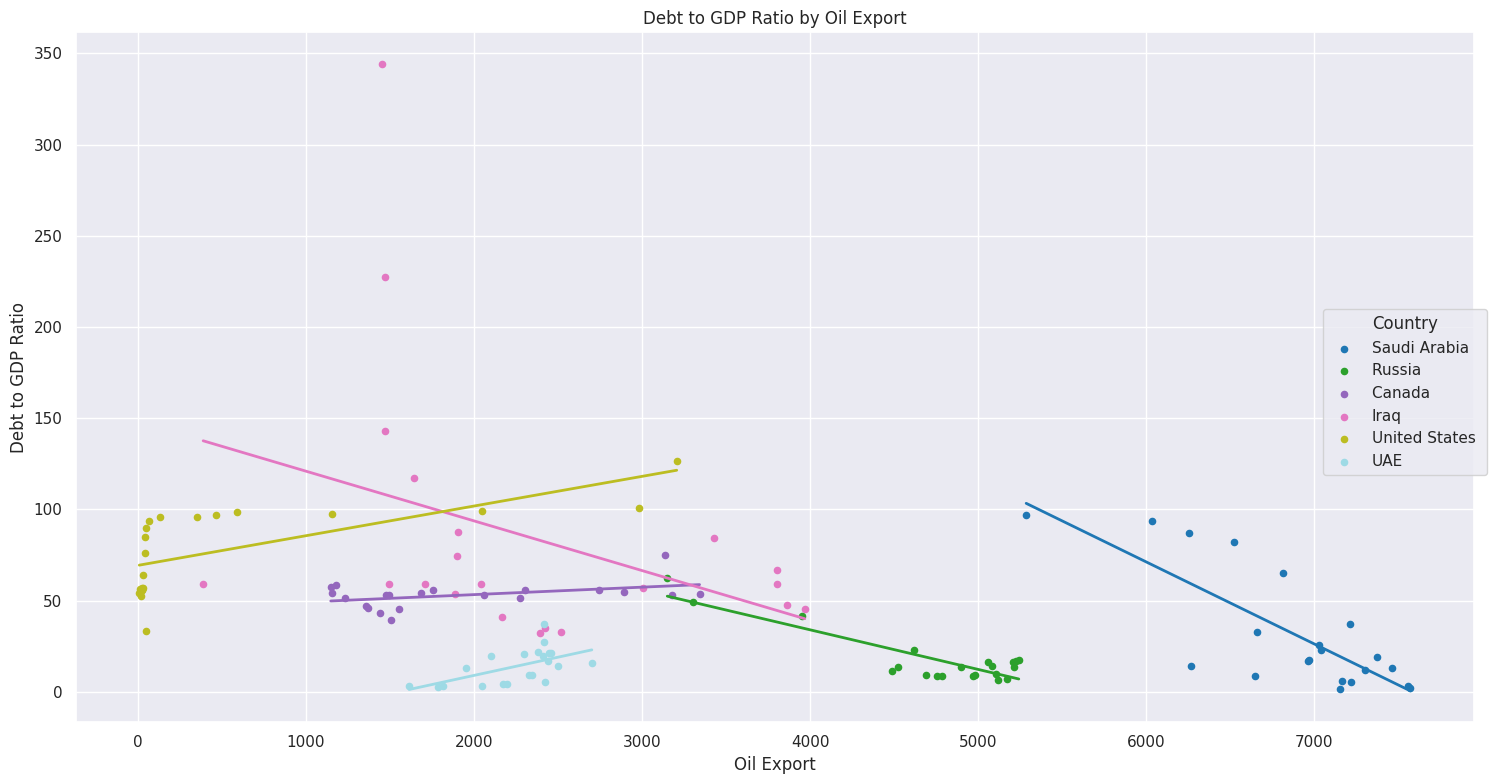

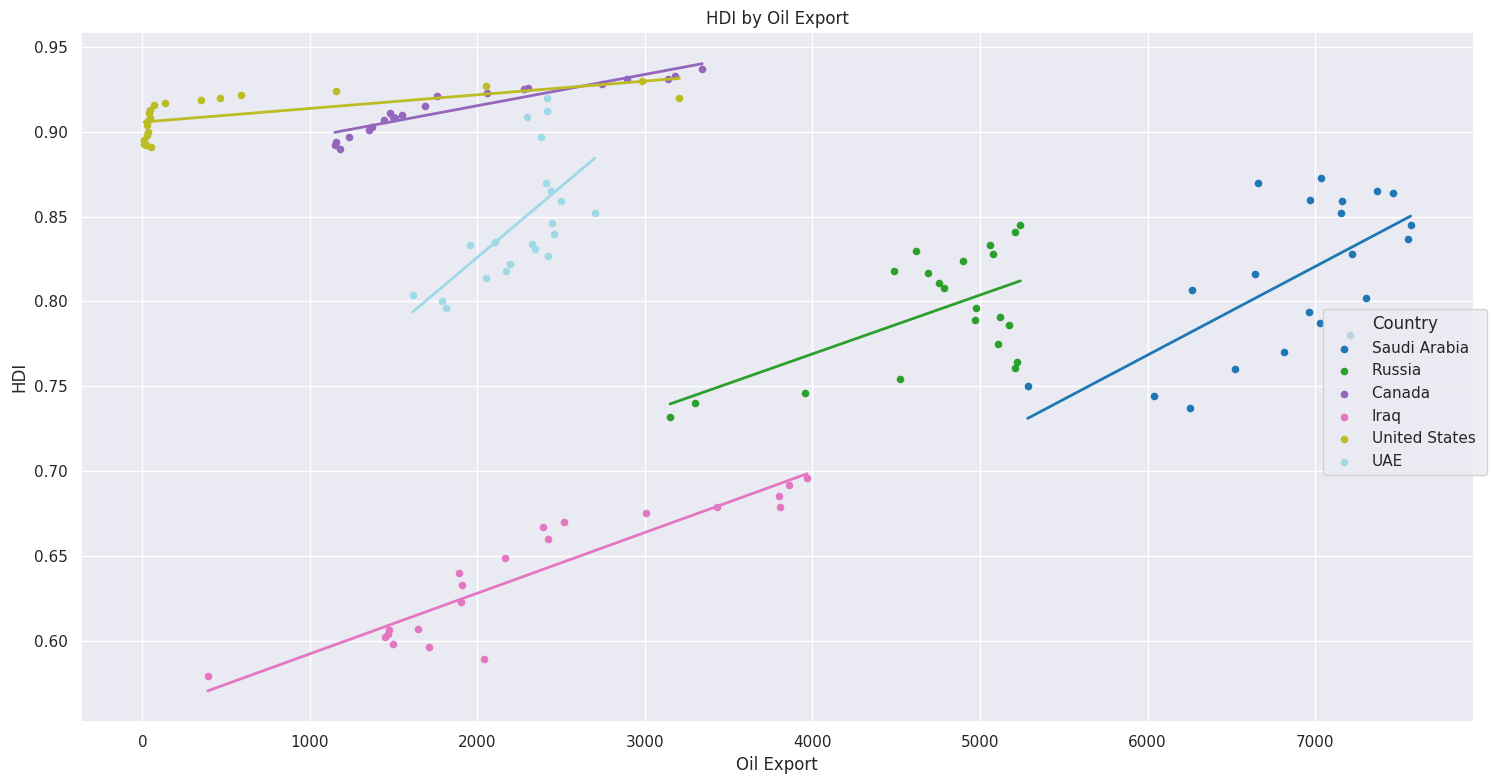

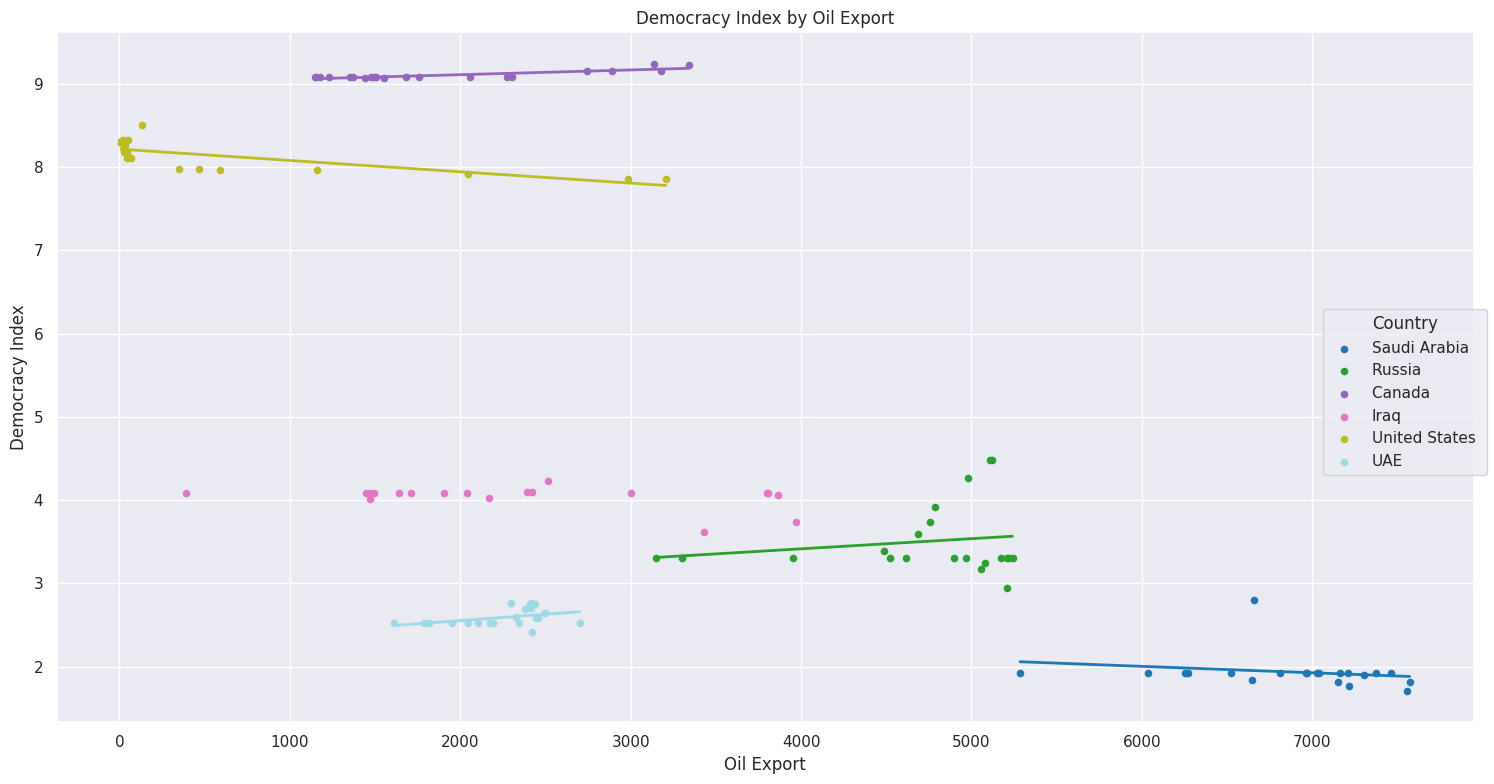

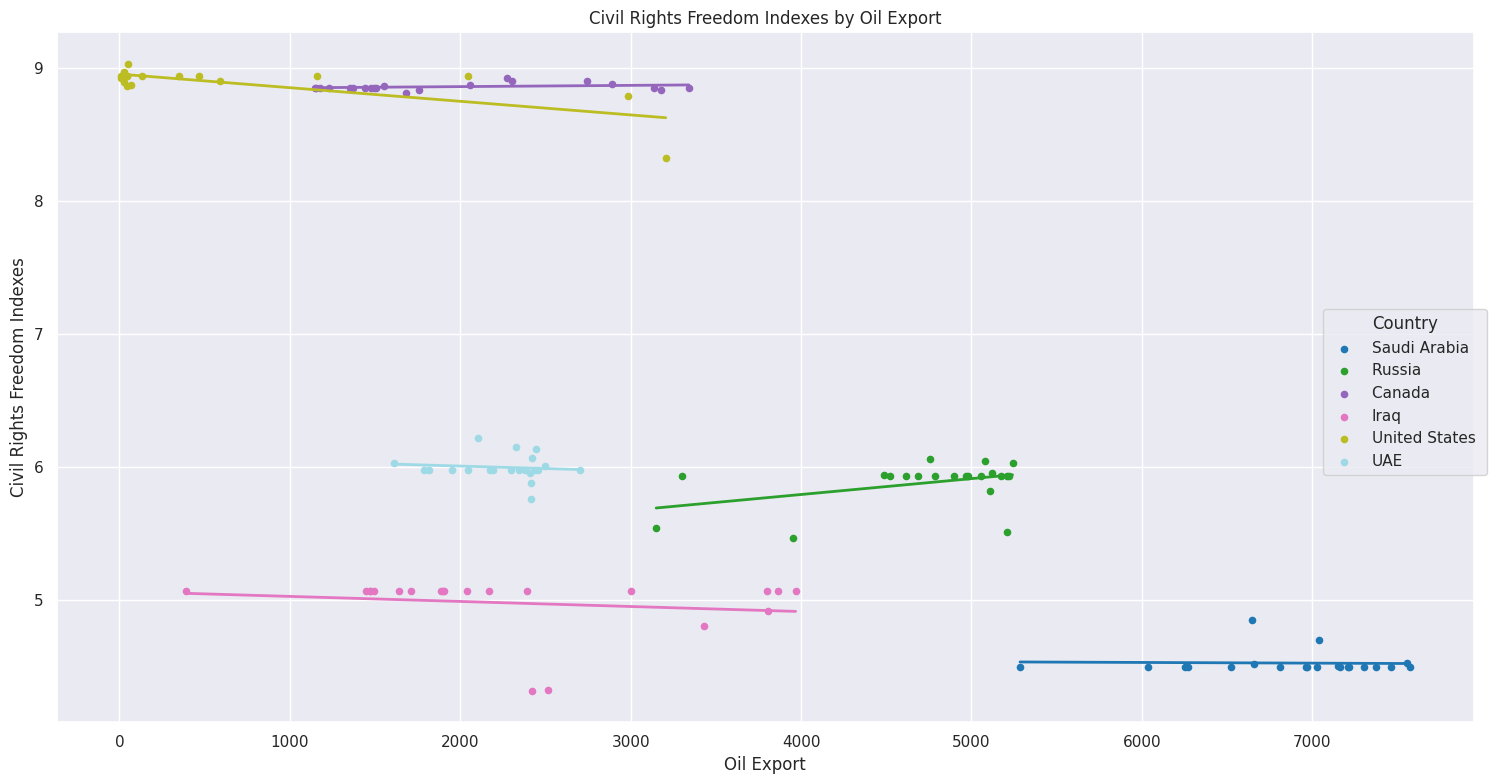

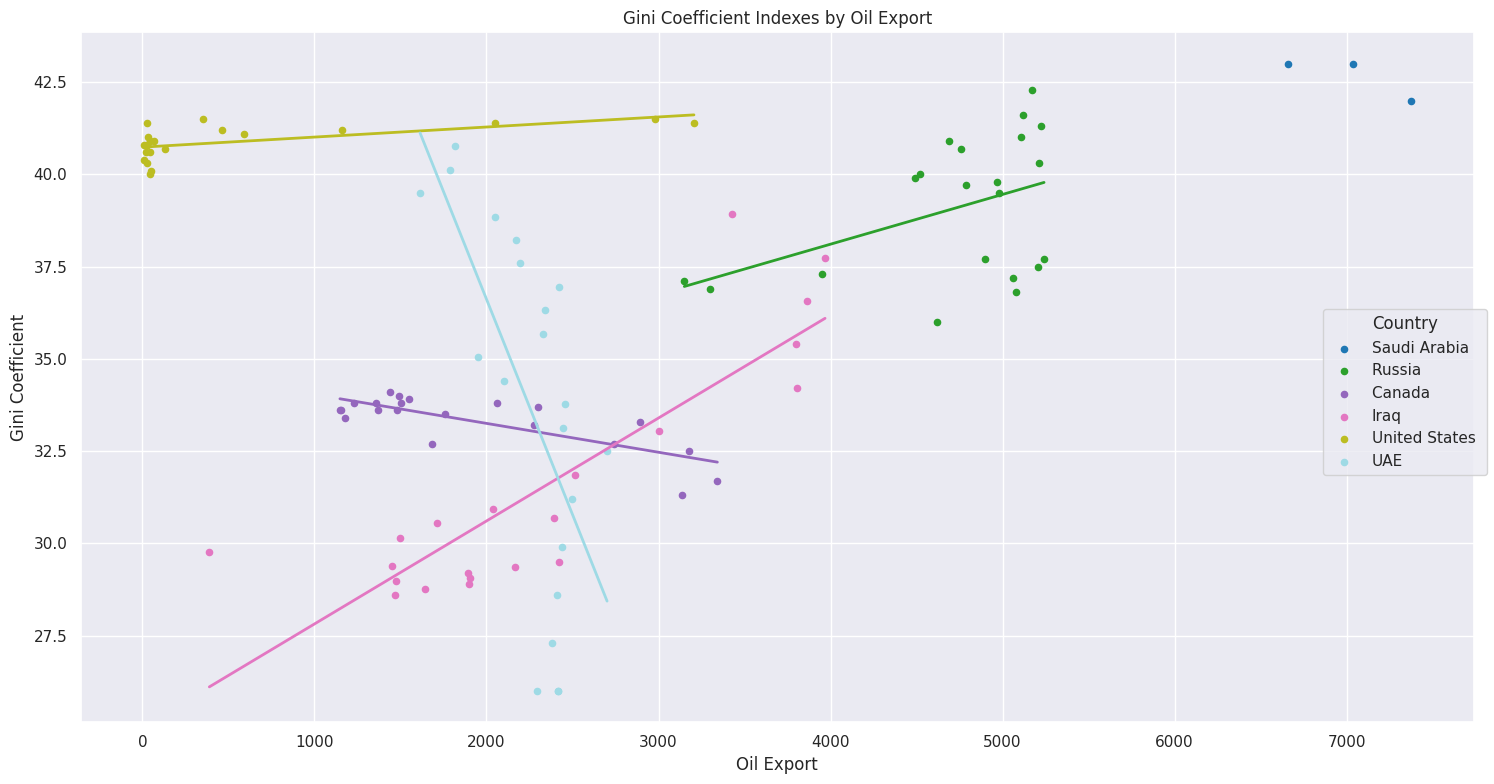

In [19]:
from scipy import stats

# Reset the index to access 'Country' and 'Year' for plotting.
df_reset = df.reset_index()

# Define a colormap for the countries.
countries = df_reset['Country'].unique()
color_map = plt.cm.tab20(np.linspace(0, 1, len(countries)))

# Set up a regression function
def plot_country_regression(ax, x, y, country_color):
    m, b = np.polyfit(x, y, 1)
    ax.plot(np.sort(x), m*np.sort(x) + b, color=country_color, linewidth=2)

# Create a function to plot seperate graphs
def plot_variable_against_oil_rent(variable, y_label, title):
  fig, axes = plt.subplots(figsize=(15, 8))
  for (color, country) in zip(color_map, countries):
    country_data = df_reset[df_reset['Country'] == country]
    axes.scatter(country_data['Oil_Export'], country_data[variable], color=color, label=country, s=20)
    plot_country_regression(axes, country_data['Oil_Export'], country_data[variable], color) # Plot the regression line
  axes.set_ylabel(y_label)
  axes.set_xlabel('Oil Export')
  axes.set_title(title)
# Add a legend
  handles, labels = axes.get_legend_handles_labels()
  fig.legend(handles, labels, loc='center right', ncol=1, title='Country')
# Plot the graph
  plt.tight_layout()
  plt.show()

# Plot each variable out
plot_variable_against_oil_rent('Debt_to_GDP_Ratio', 'Debt to GDP Ratio', 'Debt to GDP Ratio by Oil Export')
plot_variable_against_oil_rent('HDI', 'HDI', 'HDI by Oil Export')
plot_variable_against_oil_rent('Democracy_Index', 'Democracy Index', 'Democracy Index by Oil Export')
plot_variable_against_oil_rent('Civil_Rights_Freedom_Indexes', 'Civil Rights Freedom Indexes', 'Civil Rights Freedom Indexes by Oil Export')
plot_variable_against_oil_rent('Gini_Coefficient', 'Gini Coefficient', 'Gini Coefficient Indexes by Oil Export')

**Difference-in-Differenced Analysis** is a quasi-experimental design that makes use of longitudinal data from treatment and control groups to obtain an appropriate counterfactual to estimate a causal effect. DID is typically used to estimate the effect of a specific intervention or treatment (such as a passage of law, enactment of policy, or large-scale program implementation) by comparing the changes in outcomes over time between a population that is enrolled in a program (the intervention group) and a population that is not (the control group).


Treatment Event: 2016 OPEC Rebalancing Act

Despite a projected global oil glut, the Organisation of Petroleum Exporting Countries (OPEC) decided in November 2014 to maintain output. The end effect was a sharp drop in prices.

Two years later, on November 30, 2016, the group changed course and promised to cut OPEC's crude oil output by 1.2 million barrels per day (3.5 percent) over six months, to 32.5 million barrels per day, starting in January 2017. A minor price increase and some price stability were the results.

Although there might be a brief reprieve, additional oil production may begin rapidly  be stimulated by the price increase. The transient character is shown by a recent dramatic drop in prices brought on by larger than anticipated oil inventories in the United States.

This was one of the first times such a diverse group of major oil-producing countries, including both OPEC and non-OPEC members, came together to agree on production cuts. The agreement has had significant ramifications for global oil markets and the economies of the participating countries.

Conducting the DiD Analysis:
1. Defining the Treatment and Control Groups:

Treatment Group: Countries that became part of OPEC+ or significantly changed their engagement during the study period.
Control Group: Countries that did not join OPEC+ or whose membership status did not change significantly.
2. Setting the Time Frame:

Clearly define the "pre-treatment" and "post-treatment" periods based on the specific timing of the OPEC+ agreements or membership changes.

3. Statistical Modelling:

Use a regression model to estimate the treatment effect. The basic form of a DiD model is:

*Yit=α+β1⋅Postt+β2⋅Treatmenti+β3⋅(Postt×Treatmenti)+γXit+μi+λt+ϵit*

Where:
- *Yit*	is the outcome variable for country i at time t.

- *Postt* is a binary variable indicating the post-treatment period.

- *Treatmenti* is a binary variable indicating whether country i is in the treatment group.

- *Postt×Treatmenti* is the interaction term, whose coefficient (β3) estimates the DiD effect.

- *Xit* represents control variables.

- *μi* and *λt* represent country and time fixed effects, respectively.

- *ϵit* is the error term.

4. Checking Assumptions:

- Parallel Trends Assumption: Before the treatment, the treatment and control groups should have parallel trends in the outcome variable. This is crucial for the validity of the DiD estimator.
- No Interference: Ensure there's no spillover effect or interference between treatment and control groups.



In [149]:
df['Country'] = df['Country'].str.strip() #removing space bafore and after trhe string

# Set the timeframe, control group and treatment group
df['post']=np.where(df['Year'] >= 2017,1,0) # 1 if year after the Rebalancing Act and 0 otherwise
df['treatment']=np.where((df['Country'] != 'United States') & (df['Country'] != 'Canada'),1,0) # 1 if country is OPEC+ before the Rebalancing Act and 0 otherwise
df['post_treatment']=df['post']*df['treatment']

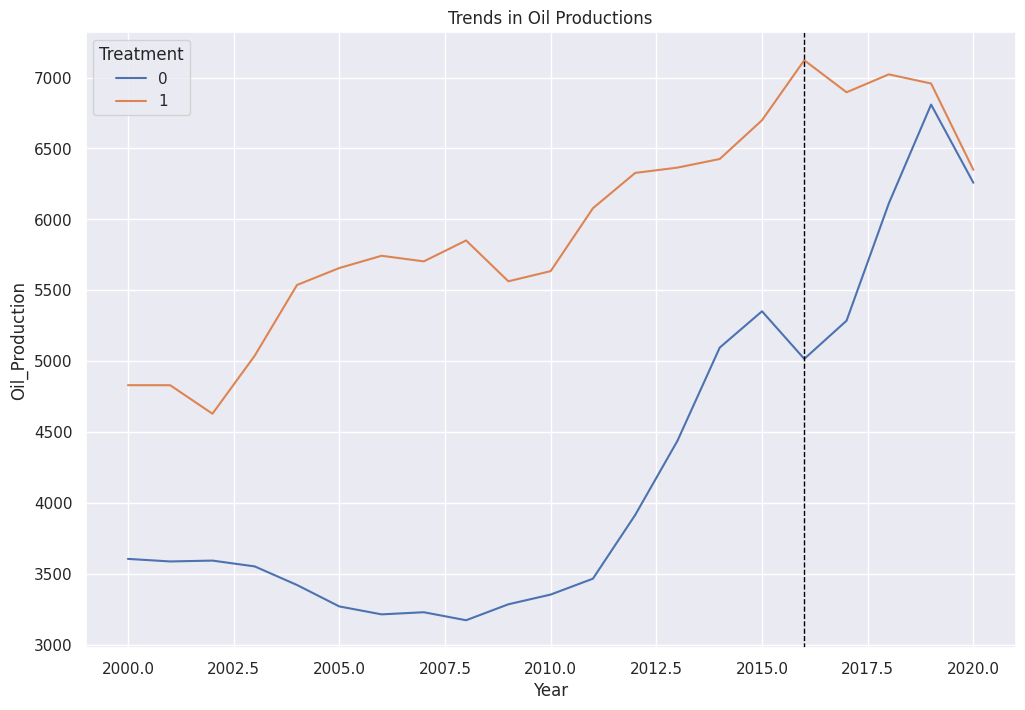

In [153]:
# Plot trends over time by group
plt.figure(figsize=(12, 8))
sns.lineplot(data= df, x='Year', y='Oil_Production', hue='Treatment', ci=None)

plt.axvline(x=2016, color='black', linestyle='--', lw=1)
plt.title('Trends in Oil Productions')
plt.show()
# 1 is OPEC+ and 0 is Not-OPEC+

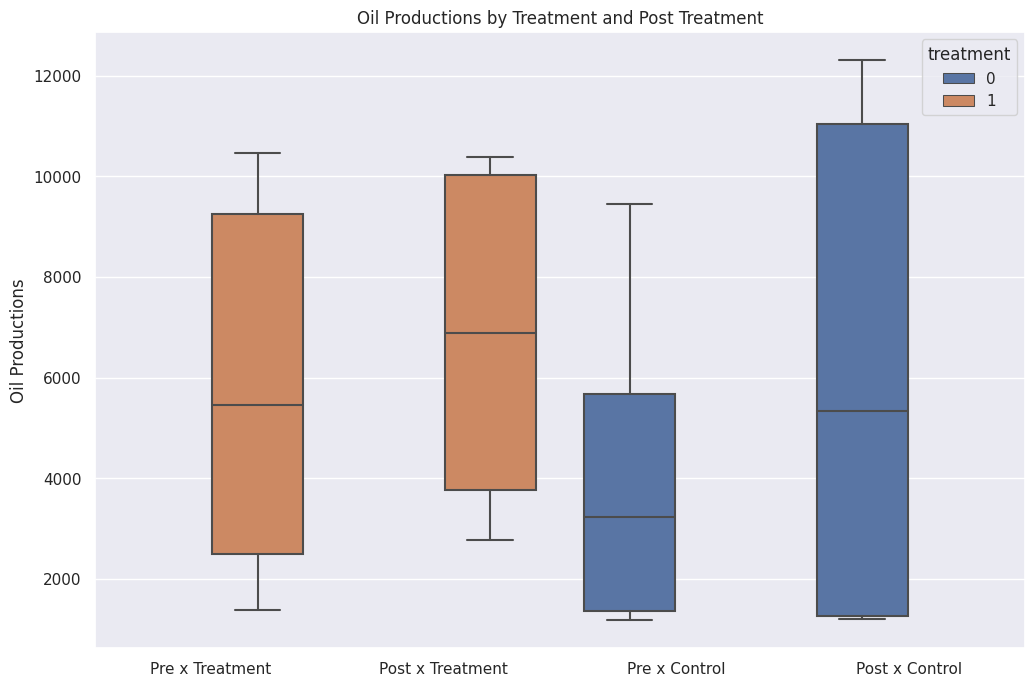

In [154]:
df['category']=df['treatment'].astype(str)+df['post'].astype(str)

sns.boxplot(data=df, x='Group', y='Oil_Production',hue='treatment')
plt.title('Oil Productions by Treatment and Post Treatment')
plt.ylabel('Oil Productions')
plt.xlabel('')

plt.show()

In [155]:
from statsmodels.formula.api import ols

# Run the OLS regression
model = ols('Oil_Production ~ post + treatment + post_treatment', df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         Oil_Production   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.066
Method:                 Least Squares   F-statistic:                     3.950
Date:                Thu, 11 Jan 2024   Prob (F-statistic):            0.00996
Time:                        23:01:33   Log-Likelihood:                -1199.0
No. Observations:                 126   AIC:                             2406.
Df Residuals:                     122   BIC:                             2417.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       3799.6176    572.436      6.